<a href="https://colab.research.google.com/github/Antonio-B85/challenge-Parte-2--TelecomX/blob/main/TelecomX_Parte2_Arboles_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.- Librerías Básicas

In [1]:
# importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')

# Ajustar la configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Ajustar la configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)
# Ajustar la configuración para mostrar más caracteres en cada celda
pd.set_option('display.max_colwidth', None)


#2.- Carga de Datos

In [2]:
# conectar a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Rutas Drive
path = '/content/drive/MyDrive/Data_Science/Challenges/TelecomX-2/TelecomX_Data_Estandarizado.csv'

datos = pd.read_csv(path)
datos_org = datos.copy()
datos.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
0          Yes            No             DSL             No          Yes   
1          Yes           Yes             DSL             No           No   
2          Yes            No     Fiber optic             No           No   
3          Yes            No     Fiber optic             No          Yes   
4          Yes            No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod  Charges.Monthly  Charges.Total  \
0              Yes      Mailed check             65.6         593.30   
1               No      Mailed check             59.9         542.40   
2              Yes  Electronic check             73.9         280.85   
3              Yes  Electronic check             98.0        1237.85   
4              Yes      Mailed check             83.9         267.40   

   Cuentas_Diarias  
0        19.776667  
1        18.080000  
2         9.361667  
3        41.261667  
4         8.913333

#3.- Análisis Inicial de Datos

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [5]:
datos.shape

(7267, 22)

In [6]:
datos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

#4.- Transformación de Datos

##4.1.- Eliminar Columnas y Filas Irrelevantes

In [7]:
# Eliminar la columna 'customerID'
datos = datos.drop(columns=['customerID'])
# Mostrar el DataFrame resultante
datos.head(3)

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    No  Female              0     Yes        Yes       9          Yes   
1    No    Male              0      No         No       9          Yes   
2   Yes    Male              0      No         No       4          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes             DSL             No           No               No   
2            No     Fiber optic             No           No              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod  Charges.Monthly  Charges.Total  Cuentas_Diarias  
0      Mailed check             65.6         593.30        19.776667  
1      Mailed check             59.9         542.40        18.080000  
2  Electronic check             73.9         280.85         9.361667

In [8]:
# Datos de la columna Churn
datos['Churn'].unique().tolist()

['No', 'Yes', 'No Info']

In [9]:
# Eliminar Filas "No Info" columna "Churn"
datos = datos[datos['Churn'] != 'No Info']

In [10]:
# Valido solo datos "Yes" o "No" en la Columna Churn
datos['Churn'].unique().tolist()

['No', 'Yes']

In [11]:
# Shaper original (7267, 22)
datos.shape

(7043, 21)

In [12]:
# Restablecer los índices
datos.reset_index(drop=True, inplace=True)
datos.tail()

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
7038    No  Female              0      No         No      13          Yes   
7039   Yes    Male              0     Yes         No      22          Yes   
7040    No    Male              0      No         No       2          Yes   
7041    No    Male              0     Yes        Yes      67          Yes   
7042    No    Male              0     Yes        Yes      63           No   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
7038                No             DSL            Yes           No   
7039               Yes     Fiber optic             No           No   
7040                No             DSL             No          Yes   
7041                No             DSL            Yes           No   
7042  No phone service             DSL            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038               No         Yes          No              No        One year   
7039               No          No          No             Yes  Month-to-month   
7040               No          No          No              No  Month-to-month   
7041              Yes         Yes          No             Yes        Two year   
7042              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod  Charges.Monthly  Charges.Total  \
7038               No      Mailed check            55.15         742.90   
7039              Yes  Electronic check            85.10        1873.70   
7040              Yes      Mailed check            50.30          92.75   
7041               No      Mailed check            67.85        4627.65   
7042               No  Electronic check            59.00        3707.60   

      Cuentas_Diarias  
7038        24.763333  
7039        62.456667  
7040         3.091667  
7041       154.255000  
7042       123.586667

##4.2.- Tratar Columnas Categóricas Binarias


In [13]:
datos.describe()

SeniorCitizen       tenure  Charges.Monthly  Charges.Total  \
count    7043.000000  7043.000000      7043.000000    7043.000000   
mean        0.162147    32.371149        64.761692    2283.296277   
std         0.368612    24.559481        30.090047    2265.000260   
min         0.000000     0.000000        18.250000      18.800000   
25%         0.000000     9.000000        35.500000     402.225000   
50%         0.000000    29.000000        70.350000    1400.550000   
75%         0.000000    55.000000        89.850000    3786.600000   
max         1.000000    72.000000       118.750000    8684.800000   

       Cuentas_Diarias  
count      7043.000000  
mean         76.109876  
std          75.500009  
min           0.626667  
25%          13.407500  
50%          46.685000  
75%         126.220000  
max         289.493333

In [14]:
datos.describe(include='O')

Churn gender Partner Dependents PhoneService MultipleLines  \
count   7043   7043    7043       7043         7043          7043   
unique     2      2       2          2            2             3   
top       No   Male      No         No          Yes            No   
freq    5174   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod  
count              7043              7043  
unique                2                 4  
top                 Yes  Electronic check  
freq               4171              2365

In [15]:
#Ajuste de datos
datos['Churn'] = datos['Churn'].replace({'No': 0, 'Yes': 1})
datos['gender'] = datos['gender'].replace({'Female': 0, 'Male': 1})
datos['Partner'] = datos['Partner'].replace({'No': 0, 'Yes': 1})
datos['Dependents'] = datos['Dependents'].replace({'No': 0, 'Yes': 1})
datos['PhoneService'] = datos['PhoneService'].replace({'No': 0, 'Yes': 1})
datos['PaperlessBilling'] = datos['PaperlessBilling'].replace({'No': 0, 'Yes': 1})

In [16]:
datos.sample(4)

Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
3825      0       0              0        1           1      71             1   
3971      0       0              0        1           1      24             1   
1315      0       1              0        1           1      22             1   
2641      1       0              0        1           0      15             1   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
3825           Yes             DSL            Yes          Yes   
3971           Yes     Fiber optic             No          Yes   
1315            No     Fiber optic             No          Yes   
2641            No     Fiber optic             No           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
3825              Yes         Yes         Yes             Yes        Two year   
3971              Yes          No          No              No        One year   
1315              Yes          No         Yes             Yes        One year   
2641               No          No         Yes             Yes  Month-to-month   

      PaperlessBilling              PaymentMethod  Charges.Monthly  \
3825                 0               Mailed check            91.05   
3971                 0  Bank transfer (automatic)            83.15   
1315                 1               Mailed check           100.05   
2641                 0           Electronic check            88.15   

      Charges.Total  Cuentas_Diarias  
3825        6293.75       209.791667  
3971        2033.05        67.768333  
1315        2090.25        69.675000  
2641        1390.60        46.353333

In [17]:
# Validando columnas trabajadas no aparecen con mas de un valor
datos.describe(include='O')

MultipleLines InternetService OnlineSecurity OnlineBackup  \
count           7043            7043           7043         7043   
unique             3               3              3            3   
top               No     Fiber optic             No           No   
freq            3390            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3095        3473        2810            2785   

              Contract     PaymentMethod  
count             7043              7043  
unique               3                 4  
top     Month-to-month  Electronic check  
freq              3875              2365

##4.3.- Tratar Columnas Categóricas No Binarias

In [18]:
# Muestra todas las columnas con 3 o más valores
datos.describe(include='O')

MultipleLines InternetService OnlineSecurity OnlineBackup  \
count           7043            7043           7043         7043   
unique             3               3              3            3   
top               No     Fiber optic             No           No   
freq            3390            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3095        3473        2810            2785   

              Contract     PaymentMethod  
count             7043              7043  
unique               3                 4  
top     Month-to-month  Electronic check  
freq              3875              2365

###4.3.1.- Método OneHotEncoder

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
datos.describe(include='O').columns

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')

In [21]:
col_categoricas = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod']

col_categoricas

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [22]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    col_categoricas),
    remainder='passthrough')

datos = one_hot_enc.fit_transform(datos)
datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
datos.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No'

In [23]:
# Renombrar Columnas no tratadas a su nombre originar sin "remainder"
datos.columns = datos.columns.str.replace('^remainder__', '', regex=True)
datos.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No'

In [24]:
datos.sample(4)

onehotencoder__MultipleLines_No  \
4628                              0.0   
5740                              1.0   
4556                              1.0   
727                               1.0   

      onehotencoder__MultipleLines_No phone service  \
4628                                            1.0   
5740                                            0.0   
4556                                            0.0   
727                                             0.0   

      onehotencoder__MultipleLines_Yes  onehotencoder__InternetService_DSL  \
4628                               0.0                                 1.0   
5740                               0.0                                 0.0   
4556                               0.0                                 0.0   
727                                0.0                                 0.0   

      onehotencoder__InternetService_Fiber optic  \
4628                                         0.0   
5740                                         0.0   
4556                                         1.0   
727                                          1.0   

      onehotencoder__InternetService_No  onehotencoder__OnlineSecurity_No  \
4628                                0.0                               1.0   
5740                                1.0                               0.0   
4556                                0.0                               0.0   
727                                 0.0                               1.0   

      onehotencoder__OnlineSecurity_No internet service  \
4628                                                0.0   
5740                                                1.0   
4556                                                0.0   
727                                                 0.0   

      onehotencoder__OnlineSecurity_Yes  onehotencoder__OnlineBackup_No  \
4628                                0.0                             0.0   
5740                                0.0                             0.0   
4556                                1.0                             1.0   
727                                 0.0                             0.0   

      onehotencoder__OnlineBackup_No internet service  \
4628                                              0.0   
5740                                              1.0   
4556                                              0.0   
727                                               0.0   

      onehotencoder__OnlineBackup_Yes  onehotencoder__DeviceProtection_No  \
4628                              1.0                                 0.0   
5740                              0.0                                 0.0   
4556                              0.0                                 1.0   
727                               1.0                                 0.0   

      onehotencoder__DeviceProtection_No internet service  \
4628                                                  0.0   
5740                                                  1.0   
4556                                                  0.0   
727                                                   0.0   

      onehotencoder__DeviceProtection_Yes  onehotencoder__TechSupport_No  \
4628                                  1.0                            1.0   
5740                                  0.0                            0.0   
4556                                  0.0                            1.0   
727                                   1.0                            0.0   

      onehotencoder__TechSupport_No internet service  \
4628                                             0.0   
5740                                             1.0   
4556                                             0.0   
727                                              0.0   

      onehotencoder__TechSupport_Yes  onehotencoder__StreamingTV_No  \
4628                             0.0                            0.0   
5740                            

##4.4.- Normalización de datos

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
len(datos.columns)

42

In [28]:
# Selecciona las columnas que deseas normalizar
columnas_a_normalizar = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

In [29]:
# Filtra las columnas que realmente existen en el DataFrame
columnas_existentes = [col for col in columnas_a_normalizar if col in datos.columns]

In [30]:
# Aplica la normalización solo a las columnas existentes
if columnas_existentes:
  datos[columnas_existentes] = scaler.fit_transform(datos[columnas_existentes])
else:
  print("No hay columnas para normalizar.")

In [31]:
datos.sample(5)

onehotencoder__MultipleLines_No  \
510                               0.0   
608                               0.0   
1043                              1.0   
2972                              0.0   
5832                              0.0   

      onehotencoder__MultipleLines_No phone service  \
510                                             1.0   
608                                             0.0   
1043                                            0.0   
2972                                            0.0   
5832                                            1.0   

      onehotencoder__MultipleLines_Yes  onehotencoder__InternetService_DSL  \
510                                0.0                                 1.0   
608                                1.0                                 0.0   
1043                               0.0                                 1.0   
2972                               1.0                                 0.0   
5832                               0.0                                 1.0   

      onehotencoder__InternetService_Fiber optic  \
510                                          0.0   
608                                          1.0   
1043                                         0.0   
2972                                         1.0   
5832                                         0.0   

      onehotencoder__InternetService_No  onehotencoder__OnlineSecurity_No  \
510                                 0.0                               1.0   
608                                 0.0                               1.0   
1043                                0.0                               1.0   
2972                                0.0                               0.0   
5832                                0.0                               1.0   

      onehotencoder__OnlineSecurity_No internet service  \
510                                                 0.0   
608                                                 0.0   
1043                                                0.0   
2972                                                0.0   
5832                                                0.0   

      onehotencoder__OnlineSecurity_Yes  onehotencoder__OnlineBackup_No  \
510                                 0.0                             1.0   
608                                 0.0                             0.0   
1043                                0.0                             1.0   
2972                                1.0                             1.0   
5832                                0.0                             0.0   

      onehotencoder__OnlineBackup_No internet service  \
510                                               0.0   
608                                               0.0   
1043                                              0.0   
2972                                              0.0   
5832                                              0.0   

      onehotencoder__OnlineBackup_Yes  onehotencoder__DeviceProtection_No  \
510                               0.0                                 0.0   
608                               1.0                                 0.0   
1043                              0.0                                 1.0   
2972                              0.0                                 0.0   
5832                              1.0                                 0.0   

      onehotencoder__DeviceProtection_No internet service  \
510                                                   0.0   
608                                                   0.0   
1043                                                  0.0   
2972                                                  0.0   
5832                                                  0.0   

      onehotencoder__DeviceProtection_Yes  onehotencoder__TechSupport_No  \
510                                   1.0                            0.0   
608                                   1.0           

##4.5.- Columnas Relacionadas

In [32]:
datos.head()

onehotencoder__MultipleLines_No  \
0                              1.0   
1                              0.0   
2                              1.0   
3                              1.0   
4                              1.0   

   onehotencoder__MultipleLines_No phone service  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   onehotencoder__MultipleLines_Yes  onehotencoder__InternetService_DSL  \
0                               0.0                                 1.0   
1                               1.0                                 1.0   
2                               0.0                                 0.0   
3                               0.0                                 0.0   
4                               0.0                                 0.0   

   onehotencoder__InternetService_Fiber optic  \
0                                         0.0   
1                                         0.0   
2                                         1.0   
3                                         1.0   
4                                         1.0   

   onehotencoder__InternetService_No  onehotencoder__OnlineSecurity_No  \
0                                0.0                               1.0   
1                                0.0                               1.0   
2                                0.0                               1.0   
3                                0.0                               1.0   
4                                0.0                               1.0   

   onehotencoder__OnlineSecurity_No internet service  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   onehotencoder__OnlineSecurity_Yes  onehotencoder__OnlineBackup_No  \
0                                0.0                             0.0   
1                                0.0                             1.0   
2                                0.0                             1.0   
3                                0.0                             0.0   
4                                0.0                             1.0   

   onehotencoder__OnlineBackup_No internet service  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   onehotencoder__OnlineBackup_Yes  onehotencoder__DeviceProtection_No  \
0                              1.0                                 1.0   
1                              0.0                                 1.0   
2                              0.0                                 0.0   
3                              1.0                                 0.0   
4                              0.0                                 1.0   

   onehotencoder__DeviceProtection_No internet service  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                                  0.0   

   onehotencoder__DeviceProtection_Yes  onehotencoder__TechSupport_No  \
0                                  0.0                            0.0   
1                                  0.0                            1.0   
2                                  1.0                            1.0   
3                                  1.0                            1.0   
4               

In [33]:
columnas_corr = datos.corr()

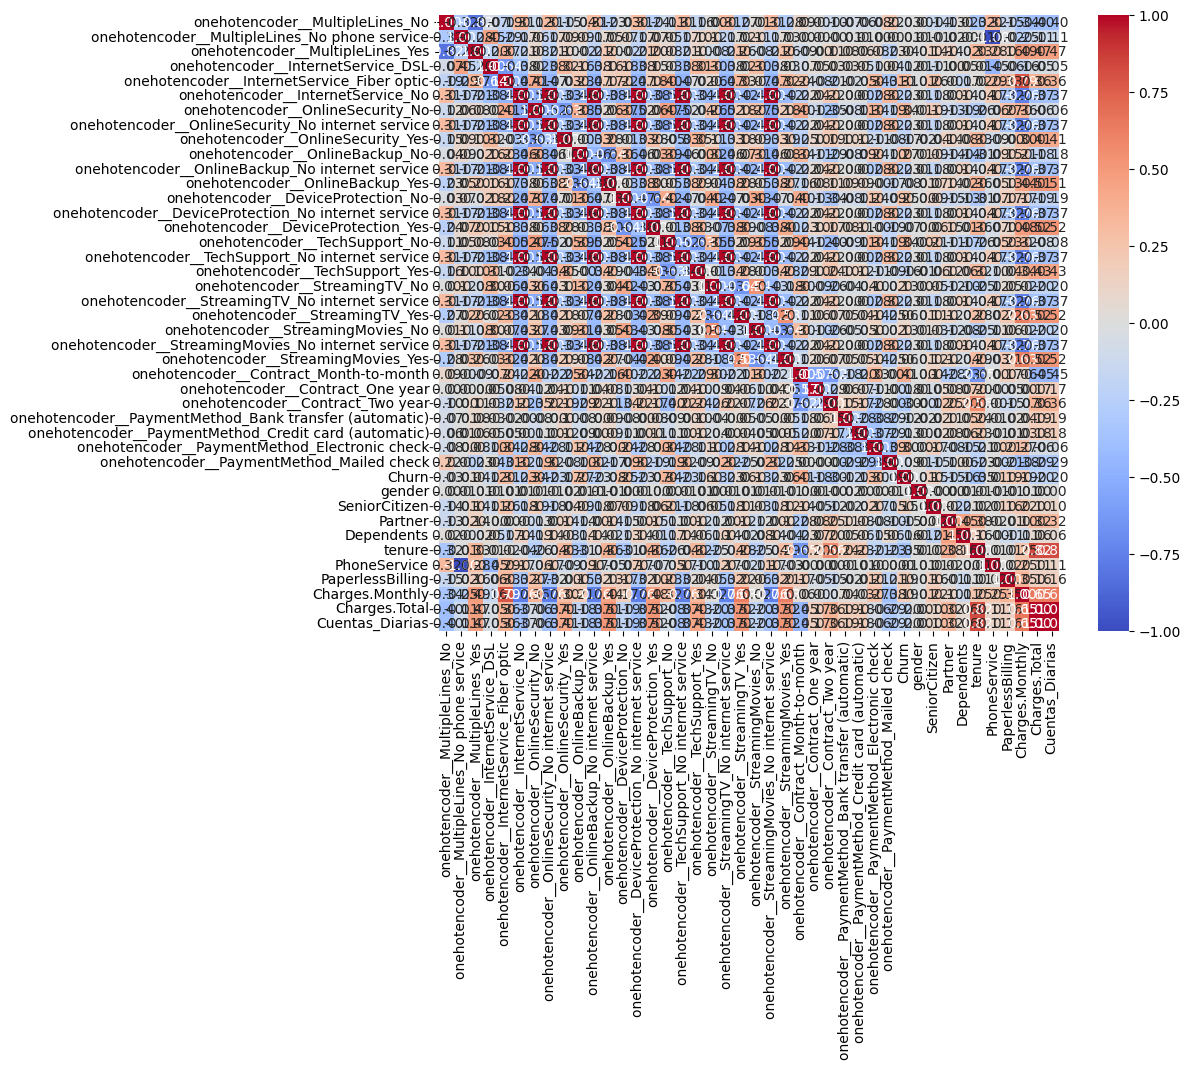

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(columnas_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [35]:
umbral = 0.8
columnas_a_eliminar = set()
for i in range(len(columnas_corr.columns)):
  for j in range(i):
    if abs(columnas_corr.iloc[i, j]) > umbral:
      colname = columnas_corr.columns[i]
      columnas_a_eliminar.add(colname)

columnas_a_eliminar

{'Charges.Total',
 'Cuentas_Diarias',
 'PhoneService',
 'onehotencoder__DeviceProtection_No internet service',
 'onehotencoder__MultipleLines_Yes',
 'onehotencoder__OnlineBackup_No internet service',
 'onehotencoder__OnlineSecurity_No internet service',
 'onehotencoder__StreamingMovies_No internet service',
 'onehotencoder__StreamingTV_No internet service',
 'onehotencoder__TechSupport_No internet service'}

In [36]:
datos = datos.drop(columns=columnas_a_eliminar)
datos_org_limpios = datos #Respaldo para pruebas
datos.sample(5)

onehotencoder__MultipleLines_No  \
4749                              1.0   
3592                              1.0   
5383                              1.0   
3332                              1.0   
1309                              1.0   

      onehotencoder__MultipleLines_No phone service  \
4749                                            0.0   
3592                                            0.0   
5383                                            0.0   
3332                                            0.0   
1309                                            0.0   

      onehotencoder__InternetService_DSL  \
4749                                 0.0   
3592                                 0.0   
5383                                 0.0   
3332                                 1.0   
1309                                 1.0   

      onehotencoder__InternetService_Fiber optic  \
4749                                         1.0   
3592                                         1.0   
5383                                         1.0   
3332                                         0.0   
1309                                         0.0   

      onehotencoder__InternetService_No  onehotencoder__OnlineSecurity_No  \
4749                                0.0                               1.0   
3592                                0.0                               0.0   
5383                                0.0                               0.0   
3332                                0.0                               0.0   
1309                                0.0                               1.0   

      onehotencoder__OnlineSecurity_Yes  onehotencoder__OnlineBackup_No  \
4749                                0.0                             1.0   
3592                                1.0                             0.0   
5383                                1.0                             1.0   
3332                                1.0                             0.0   
1309                                0.0                             1.0   

      onehotencoder__OnlineBackup_Yes  onehotencoder__DeviceProtection_No  \
4749                              0.0                                 1.0   
3592                              1.0                                 1.0   
5383                              0.0                                 1.0   
3332                              1.0                                 1.0   
1309                              0.0                                 1.0   

      onehotencoder__DeviceProtection_Yes  onehotencoder__TechSupport_No  \
4749                                  0.0                            1.0   
3592                                  0.0                            1.0   
5383                                  0.0                            1.0   
3332                                  0.0                            0.0   
1309                                  0.0                            1.0   

      onehotencoder__TechSupport_Yes  onehotencoder__StreamingTV_No  \
4749                             0.0                            1.0   
3592                             0.0                            0.0   
5383                             0.0                            0.0   
3332                             1.0                            0.0   
1309                             0.0                            1.0   

      onehotencoder__StreamingTV_Yes  onehotencoder__StreamingMovies_No  \
4749                             0.0                                0.0   
3592                             1.0                                1.0   
5383                             1.0                                1.0   
3332                             1.0                                0.0   
1309                             0.0                                1.0   

      onehotencoder__StreamingMovies_Yes  \
4749                                 1.0   
3592                                 0.0   
5383  

In [37]:
len(datos.columns)

32

#5.- Análisis gráfico del conjunto de datos

##5.1.- Verificación de la Proporción de Cancelación (Churn)

In [38]:
datos_churn = datos.groupby('Churn').size().reset_index(name='count')
datos_churn

Churn  count
0    0.0   5174
1    1.0   1869

In [39]:
datos_churn.columns

Index(['Churn', 'count'], dtype='object')

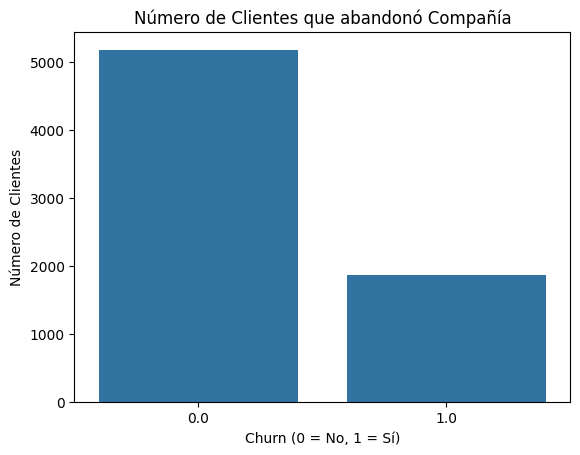

In [40]:
import seaborn as sns

sns.barplot(data=datos_churn, x='Churn', y='count')
plt.title('Número de Clientes que abandonó Compañía')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Número de Clientes')
plt.show()

##5.2.- Análisis Dirigido

###5.2.1.- Tiempo de contrato × Cancelación

In [41]:
datos_org.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

In [42]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__MultipleLines_No                         7043 non-null   float64
 1   onehotencoder__MultipleLines_No phone service           7043 non-null   float64
 2   onehotencoder__InternetService_DSL                      7043 non-null   float64
 3   onehotencoder__InternetService_Fiber optic              7043 non-null   float64
 4   onehotencoder__InternetService_No                       7043 non-null   float64
 5   onehotencoder__OnlineSecurity_No                        7043 non-null   float64
 6   onehotencoder__OnlineSecurity_Yes                       7043 non-null   float64
 7   onehotencoder__OnlineBackup_No                          7043 non-null   float64
 8   onehotencoder__OnlineBackup_Yes       

In [43]:
columnas_contrato = [col for col in datos_org.columns if 'Contract' in col]
columnas_analisis = columnas_contrato + ['Churn']
# Crear nuevo DataFrame
df_contrato_churn = datos_org[columnas_analisis].copy()
df_contrato_churn.head()

Contract Churn
0        One year    No
1  Month-to-month    No
2  Month-to-month   Yes
3  Month-to-month   Yes
4  Month-to-month   Yes

In [44]:
valores_unicos_churn = df_contrato_churn['Churn'].unique().tolist()
print(valores_unicos_churn)

['No', 'Yes', 'No Info']


In [45]:
# Eliminar las filas donde 'Churn' es igual a 'No Info'
df_contrato_churn = df_contrato_churn[df_contrato_churn['Churn'] != 'No Info']
conteos_valores = df_contrato_churn['Churn'].value_counts()
conteos_valores

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [46]:
df_contrato_churn['Churn'] = df_contrato_churn['Churn'].replace({'No': 0, 'Yes': 1})
df_contrato_churn.head()

Contract  Churn
0        One year      0
1  Month-to-month      0
2  Month-to-month      1
3  Month-to-month      1
4  Month-to-month      1

In [47]:
df_contrato_churn.columns

Index(['Contract', 'Churn'], dtype='object')

In [48]:
valores_unicos_lista = df_contrato_churn['Contract'].unique().tolist()
print(valores_unicos_lista)

['One year', 'Month-to-month', 'Two year']


In [49]:
df_contrato_churn.columns

Index(['Contract', 'Churn'], dtype='object')

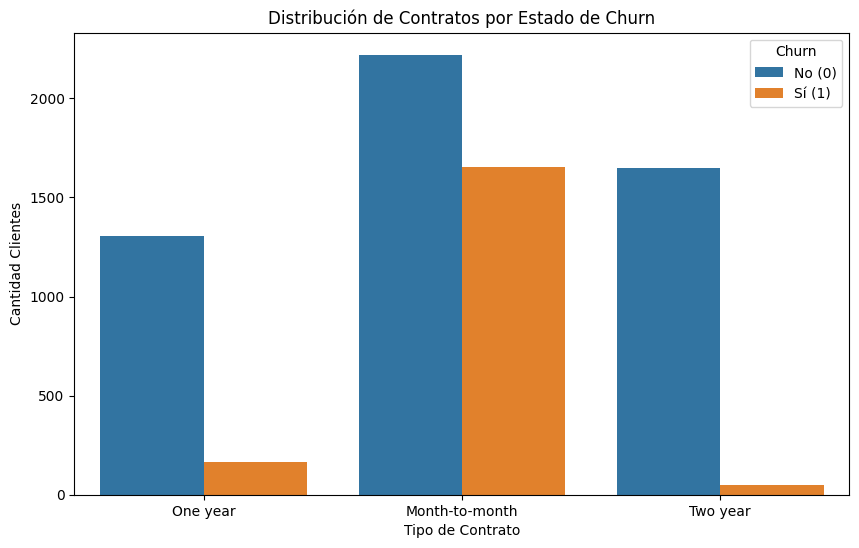

In [50]:
# Gráfico con distribución por Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_contrato_churn, x='Contract', hue='Churn')
plt.title('Distribución de Contratos por Estado de Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad Clientes')
plt.legend(title='Churn', labels=['No (0)', 'Sí (1)'])
plt.show()

###5.2.2.- Gasto total × Cancelación

In [51]:
datos_org.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

In [52]:
columnas_gasto_total = [col for col in datos_org.columns if 'Charges.Total' in col]
columnas_analisis = columnas_gasto_total + ['Churn']
# Crear nuevo DataFrame
df_gasto_total_churn = datos_org[columnas_analisis].copy()
df_gasto_total_churn.head()

Charges.Total Churn
0         593.30    No
1         542.40    No
2         280.85   Yes
3        1237.85   Yes
4         267.40   Yes

In [53]:
# Eliminar las filas donde 'Churn' es igual a 'No Info'
df_gasto_total_churn = df_gasto_total_churn[df_gasto_total_churn['Churn'] != 'No Info']
conteos_valores = df_gasto_total_churn['Churn'].value_counts()
conteos_valores

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [54]:
df_gasto_total_churn['Churn'] = df_gasto_total_churn['Churn'].replace({'No': 0, 'Yes': 1})
df_gasto_total_churn.head()

Charges.Total  Churn
0         593.30      0
1         542.40      0
2         280.85      1
3        1237.85      1
4         267.40      1

In [55]:
# Agrupar los datos por Churn y sumar los Charges.total
df_gasto_total_churn = df_gasto_total_churn.groupby('Churn')['Charges.Total'].sum().reset_index()
df_gasto_total_churn

Churn  Charges.Total
0      0   1.321833e+07
1      1   2.862927e+06

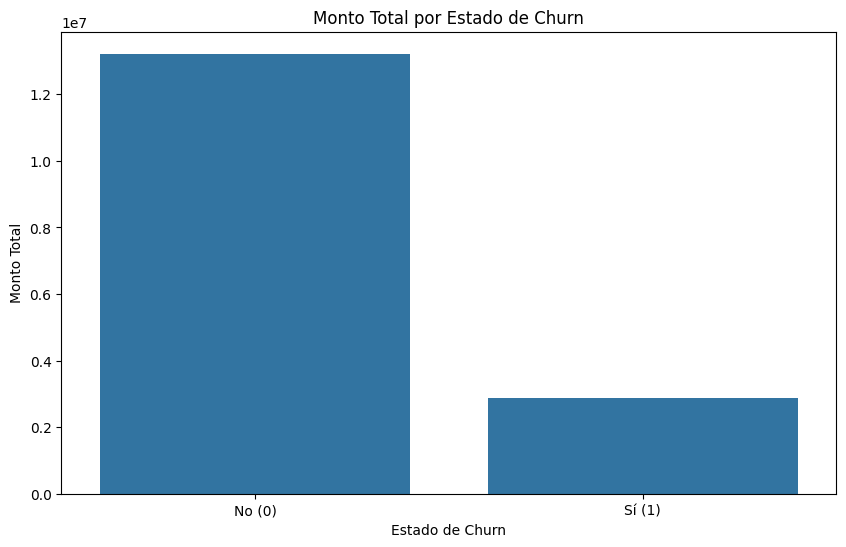

In [56]:
# Gráfico con distribución por Churn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_gasto_total_churn, x='Churn', y='Charges.Total')
plt.title('Monto Total por Estado de Churn')
plt.xlabel('Estado de Churn')
plt.ylabel('Monto Total')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Sí (1)'])  # Etiquetas personalizadas para el eje X
plt.show()

##5.3.- Analizando la distribución de datos

In [57]:
datos_org.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
0          Yes            No             DSL             No          Yes   
1          Yes           Yes             DSL             No           No   
2          Yes            No     Fiber optic             No           No   
3          Yes            No     Fiber optic             No          Yes   
4          Yes            No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod  Charges.Monthly  Charges.Total  \
0              Yes      Mailed check             65.6         593.30   
1               No      Mailed check             59.9         542.40   
2              Yes  Electronic check             73.9         280.85   
3              Yes  Electronic check             98.0        1237.85   
4              Yes      Mailed check             83.9         267.40   

   Cuentas_Diarias  
0        19.776667  
1        18.080000  
2         9.361667  
3        41.261667  
4         8.913333

In [58]:
def ancho_bin(df, columna):
  q75, q25 = np.percentile(df[columna], [75, 25])
  iqr = q75 - q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

In [59]:
binwidth = ancho_bin(datos_org, 'tenure')
binwidth

np.float64(4.7497356641408635)

<Axes: xlabel='tenure', ylabel='Count'>

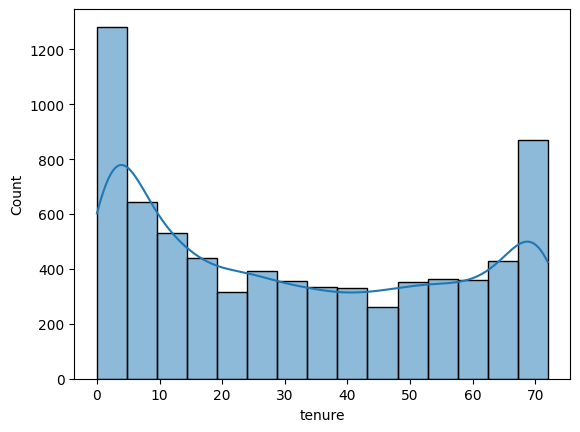

In [60]:
sns.histplot(data=datos_org, x='tenure', kde=True, binwidth = binwidth)

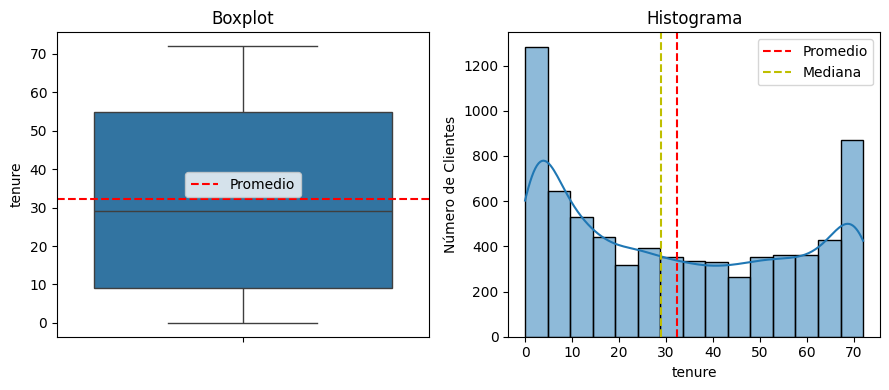

In [61]:
ternure_promedio = datos_org['tenure'].mean()
ternure_mediana = datos_org['tenure'].median()

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=datos_org, y='tenure', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=ternure_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()


binwidth = ancho_bin(datos_org, 'tenure')
sns.histplot(data=datos_org, x='tenure',ax=ax[1], kde=True, binwidth = binwidth)
plt.ylabel('Número de Clientes')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=ternure_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=ternure_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show()

#6.- Definiendo una baseline

In [62]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [63]:
len(datos.columns)

32

In [64]:
datos.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMeth

In [65]:
X = datos.drop(columns='Churn', axis=1)
y = datos['Churn']

In [66]:
#X sin churn
X.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMeth

In [67]:
#y churn
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Churn, dtype: float64

In [68]:
# Base Line con dummy regresor y test al 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [70]:
#Probando el DummyRegresor
y_pred_dummy = baseline.predict(X_test)

In [71]:
#Funcion para calcular métricas
def calcular_regresion(y_test, y_pred):
  rmse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  metricas = {
      'RMSE': round(rmse**(1/2), 4),
      'MAE': round(mae, 4),
      'R2': round(r2, 4)
  }
  return metricas

In [72]:
# Análisis Baseline
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 0.4391, 'MAE': 0.3887, 'R2': -0.0002}

**Nota**: En resumen, estas métricas indican que el modelo tiene un rendimiento relativamente bajo, ya que tanto el RMSE como el MAE son valores positivos, y el R² es negativo, lo que sugiere que el modelo no está capturando adecuadamente la relación entre las variables.

#7.- Modelo Arbol de Decisión

##7.1.- Creando el Modelo

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [74]:
len(datos_org_limpios.columns)

32

In [75]:
datos_org_limpios.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMeth

In [76]:
X = datos_org_limpios.drop(columns='Churn', axis=1)
y = datos_org_limpios['Churn']

In [77]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

In [78]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
modelo_dtc.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo_dtc.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es: {modelo_dtc.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 0.8832702160837603
La exactitud del modelo con el conjunto de validación es: 0.758183032732131


##7.2.- Evaluando el Modelo

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
y_previsto = modelo_dtc.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[928 172]
 [190 207]]


In [81]:
from sklearn.metrics import ConfusionMatrixDisplay

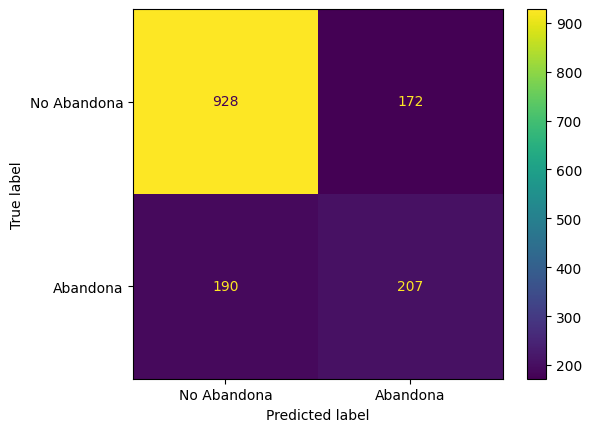

In [82]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['No Abandona', 'Abandona'])
visualizacion.plot();

##7.3.- Exactitud, precisión y recall (sensibilidad).

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [84]:
print(f'La precisión del modelo es: {precision_score(y_val, y_previsto)}')
print(f'La sensibilidad (recall) del modelo es: {recall_score(y_val, y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val, y_previsto)}')
print(f'La F1-score del modelo es: {f1_score(y_val, y_previsto)}')

La precisión del modelo es: 0.5461741424802111
La sensibilidad (recall) del modelo es: 0.5214105793450882
La exactitud (accuracy) del modelo es: 0.758183032732131
La F1-score del modelo es: 0.5335051546391752


##7.4.- Curva ROC

In [85]:
from sklearn.metrics import RocCurveDisplay

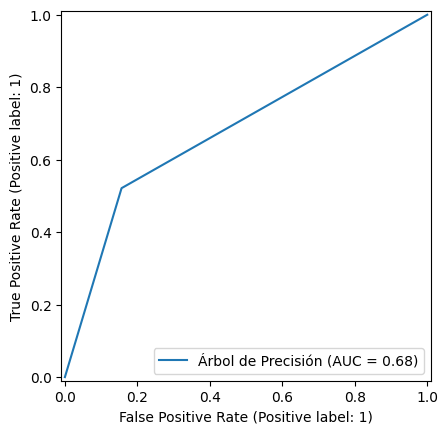

In [86]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Árbol de Precisión');

In [87]:
from sklearn.metrics import roc_auc_score

In [88]:
print(f'El área bajo la curva es: {roc_auc_score(y_val, y_previsto)}')

El área bajo la curva es: 0.6825234714907259


##7.5.- Curva de  precisión x sensibilidad

In [89]:
from sklearn.metrics import PrecisionRecallDisplay

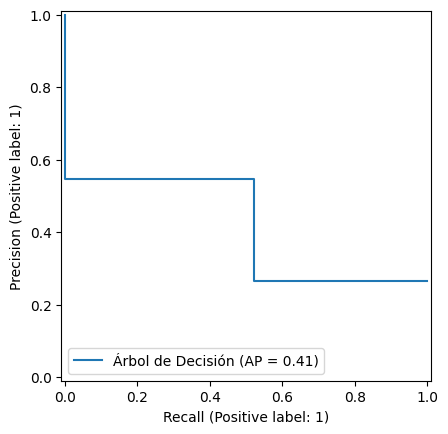

In [90]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Árbol de Decisión');

In [91]:
from sklearn.metrics import average_precision_score

In [92]:
print(f'El score promedio de Precisión vs Recall es: {average_precision_score(y_val, y_previsto)}')

El score promedio de Precisión vs Recall es: 0.41170148373594434


##7.6.- Informe de métricas

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84      1100
         1.0       0.55      0.52      0.53       397

    accuracy                           0.76      1497
   macro avg       0.69      0.68      0.69      1497
weighted avg       0.75      0.76      0.76      1497



##7.7.- Validación cruzada

###7.7.1.- Usando KFold

In [95]:
from sklearn.model_selection import KFold, cross_validate

In [96]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_dtc, X, y, cv=kf)
cv_resultados

{'fit_time': array([0.02566171, 0.02422905, 0.0227685 , 0.02465343, 0.02401853]),
 'score_time': array([0.0043323 , 0.00284123, 0.00278926, 0.00282288, 0.00279689]),
 'test_score': array([0.77462437, 0.74101921, 0.74937343, 0.74603175, 0.75605681])}

In [97]:
cv_resultados['test_score']

array([0.77462437, 0.74101921, 0.74937343, 0.74603175, 0.75605681])

In [98]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio típico es de: {desvio_std}')
print(f'El Intervalo de confianza es: [{(promedio-2*desvio_std), (min(promedio+2*desvio_std,1))}]')

El promedio de exactitud es de: 0.7534211153928225
El desvio típico es de: 0.011673206081966817
El Intervalo de confianza es: [(np.float64(0.7300747032288889), np.float64(0.7767675275567562))]


###7.7.2.- Validación cruzada con sensibilidad

In [99]:
def intervalo_confianza(resultado):
  promedio = resultado['test_score'].mean()
  desvio_std = resultado['test_score'].std()
  return f'El Intervalo de confianza es: [{(promedio-2*desvio_std), (min(promedio+2*desvio_std,1))}]'

In [100]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_dtc, X, y, cv=kf, scoring='recall')
cv_resultados

{'fit_time': array([0.02558279, 0.02490854, 0.02407575, 0.02554798, 0.02330518]),
 'score_time': array([0.00528455, 0.00532889, 0.00490403, 0.00504923, 0.00497389]),
 'test_score': array([0.50165017, 0.49560117, 0.49230769, 0.48101266, 0.49342105])}

In [101]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_dtc, X, y, cv=kf, scoring='precision')
cv_resultados

{'fit_time': array([0.04206586, 0.02774763, 0.02362967, 0.02247477, 0.02537179]),
 'score_time': array([0.00954628, 0.0050807 , 0.00489831, 0.00510526, 0.00504208]),
 'test_score': array([0.56321839, 0.55369128, 0.52960526, 0.51957295, 0.5221843 ])}

In [102]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_dtc, X, y, cv=kf, scoring='f1')
cv_resultados

{'fit_time': array([0.02513623, 0.02430844, 0.02562928, 0.02453041, 0.02327585]),
 'score_time': array([0.00494099, 0.00494146, 0.00506067, 0.00557613, 0.00494504]),
 'test_score': array([0.53710247, 0.51242236, 0.51685393, 0.49087894, 0.50741351])}

###7.7.3.- Estratificando los datos

In [103]:
datos.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMeth

In [104]:
datos['Churn'].value_counts(normalize=True)

Churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64

In [105]:
from sklearn.model_selection import StratifiedKFold

In [106]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_dtc, X, y, cv=skf, scoring='recall')

In [107]:
intervalo_confianza(cv_resultados)

'El Intervalo de confianza es: [(np.float64(0.43343153622613145), np.float64(0.5496289958850524))]'

##7.8.- Balanceo de los datos

###7.8.1.- Oversampling

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
oversampling = SMOTE()
x_balanceada, y_balanceada = oversampling.fit_resample(X, y)

In [110]:
y_balanceada.value_counts(normalize=True)

Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

In [111]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_dtc, x_balanceada, y_balanceada, cv=skf, scoring='recall')

In [112]:
intervalo_confianza(cv_resultados)

'El Intervalo de confianza es: [(np.float64(0.7992951961574655), np.float64(0.8668228098410864))]'

###7.8.2.- Pipeline para validación

In [113]:
from imblearn.pipeline import Pipeline as imbpipeline

In [114]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()),('arbol', modelo_dtc)])

In [115]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [116]:
intervalo_confianza(cv_resultados)

'El Intervalo de confianza es: [(np.float64(0.5924626525437608), np.float64(0.7492868464939948))]'

###7.8.3.- Undersampling

In [117]:
from imblearn.under_sampling import NearMiss

In [118]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)),('arbol', modelo_dtc)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [119]:
intervalo_confianza(cv_resultados)

'El Intervalo de confianza es: [(np.float64(0.4989950848330098), np.float64(0.6691020522421645))]'

###7.8.4.- SMOTEENN

In [120]:
from imblearn.combine import SMOTEENN

In [121]:
# Modelo y pipeline con SMOTEENN
modelo_dtc = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arbol', modelo_dtc)])

# Validación cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [122]:
intervalo_confianza(cv_resultados)

'El Intervalo de confianza es: [(np.float64(0.7071487055294401), np.float64(0.7856037100013815))]'

###7.8.5.- Probando el modelo

In [123]:
X = datos_org_limpios.drop(columns='Churn', axis=1)
y = datos_org_limpios['Churn']
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)

In [124]:
# Crear el objeto SMOTEENN
smoteenn = SMOTEENN()
# Aplicar SMOTEENN para balancear los datos
x_balanceada, y_balanceada = smoteenn.fit_resample(X, y)

              precision    recall  f1-score   support

         0.0       0.90      0.69      0.78       777
         1.0       0.48      0.78      0.59       280

    accuracy                           0.72      1057
   macro avg       0.69      0.74      0.69      1057
weighted avg       0.79      0.72      0.73      1057



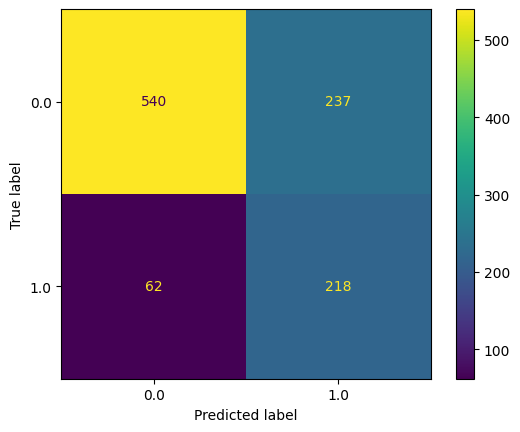

In [125]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
modelo_dtc.fit(x_balanceada, y_balanceada)
y_previsto = modelo_dtc.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

##7.9.- Features Importances - Arboles De Decisión


In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [127]:
X = datos_org_limpios.drop(columns='Churn', axis=1)
y = datos_org_limpios['Churn']

In [128]:
# Oversampling
oversampling = SMOTE()
x_balanceada, y_balanceada = oversampling.fit_resample(X, y)

y_balanceada.value_counts(normalize=True)

# Decision Tree Classifier
modelo_dtc = DecisionTreeClassifier(max_depth=10)
modelo_dtc.fit(x_balanceada, y_balanceada)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados_dtc = cross_validate(modelo_dtc, x_balanceada, y_balanceada, cv=skf, scoring='recall')

intervalo_confianza(cv_resultados_dtc)

'El Intervalo de confianza es: [(np.float64(0.7854186418659624), np.float64(0.8577897603803676))]'

In [129]:
# Acceder a las importancias de las características
importances_dtc = modelo_dtc.feature_importances_

In [130]:
# Crear DataFrame de importancias
features_importances_dtc_test = pd.DataFrame({'Features': X.columns, 'Importances': (importances_dtc * 100).round(2)}).sort_values(by=['Importances', 'Features'], ascending=[False, True])
features_importances_dtc_test

Features  Importances
17                  onehotencoder__Contract_Month-to-month        43.84
28                                                  tenure         9.67
30                                         Charges.Monthly         8.64
5                         onehotencoder__OnlineSecurity_No         7.42
29                                        PaperlessBilling         4.53
3               onehotencoder__InternetService_Fiber optic         4.46
22           onehotencoder__PaymentMethod_Electronic check         3.20
15                       onehotencoder__StreamingMovies_No         2.25
27                                              Dependents         1.84
24                                                  gender         1.78
0                          onehotencoder__MultipleLines_No         1.57
19                        onehotencoder__Contract_Two year         1.36
6                        onehotencoder__OnlineSecurity_Yes         1.11
25                                           SeniorCitizen         1.10
2                       onehotencoder__InternetService_DSL         0.81
23               onehotencoder__PaymentMethod_Mailed check         0.74
7                           onehotencoder__OnlineBackup_No         0.71
18                        onehotencoder__Contract_One year         0.65
26                                                 Partner         0.64
11                           onehotencoder__TechSupport_No         0.57
10                     onehotencoder__DeviceProtection_Yes         0.48
21    onehotencoder__PaymentMethod_Credit card (automatic)         0.47
16                      onehotencoder__StreamingMovies_Yes         0.43
8                          onehotencoder__OnlineBackup_Yes         0.39
1            onehotencoder__MultipleLines_No phone service         0.31
13                           onehotencoder__StreamingTV_No         0.28
9                       onehotencoder__DeviceProtection_No         0.23
14                          onehotencoder__StreamingTV_Yes         0.21
20  onehotencoder__PaymentMethod_Bank transfer (automatic)         0.20
12                          onehotencoder__TechSupport_Yes         0.12
4                        onehotencoder__InternetService_No         0.00

In [131]:
# Dividir los datos balanceados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    x_balanceada,
    y_balanceada,
    test_size=0.15,
    stratify=y_balanceada,
    random_state=5
)

In [132]:
# Preparar DataFrame para resultados
resultados = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'])
model_features = RandomForestClassifier(max_depth=5, random_state=42)  # Usando Classifier
ct_features = [i if i != 0 else 1 for i in range(0, 40, 5)]

In [133]:
for i in ct_features:
    selected_features = features_importances_dtc_test['Features'].values[:i]
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    model_features.fit(X_train_sel, y_train)
    y_pred = model_features.predict(X_test_sel)

    # Calcular métricas de clasificación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    resultados[i] = [accuracy, precision, recall, f1]
resultados

1         5         10        15        20        25  \
Accuracy   0.748873  0.797811  0.806825  0.795879  0.792015  0.796523   
Precision  0.686237  0.773318  0.789793  0.777108  0.771531  0.782130   
Recall     0.917632  0.842986  0.836551  0.830116  0.830116  0.822394   
F1         0.785242  0.806650  0.812500  0.802738  0.799752  0.801757   

                 30        35  
Accuracy   0.793303  0.790728  
Precision  0.774038  0.771635  
Recall     0.828829  0.826255  
F1         0.800497  0.798011

In [134]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = range(5, 11)

for i in ct_features:
 selected_features = features_importances_dtc_test['Features'].values[:i]
 X_train_sel = X_train[selected_features]
 X_test_sel = X_test[selected_features]
 model_features.fit(X_train_sel, y_train)
 y_pred = model_features.predict(X_test_sel)
 metricas = calcular_regresion(y_test, y_pred)
 resultados[i] = list(metricas.values())

resultados

5       6       7       8       9       10
RMSE  0.3791  0.3759  0.3741  0.3743  0.3737  0.3736
MAE   0.3026  0.2998  0.2988  0.2989  0.2990  0.2991
R2    0.4250  0.4348  0.4403  0.4397  0.4413  0.4417

In [135]:
selected_features = features_importances_dtc_test['Features'].values[:10]
X_selected_features = X[selected_features]
X_selected_features

onehotencoder__Contract_Month-to-month    tenure  Charges.Monthly  \
0                                        0.0  0.125000         0.471144   
1                                        1.0  0.125000         0.414428   
2                                        1.0  0.055556         0.553731   
3                                        1.0  0.180556         0.793532   
4                                        1.0  0.041667         0.653234   
5                                        1.0  0.125000         0.508955   
6                                        0.0  0.986111         0.909950   
7                                        0.0  0.875000         0.660697   
8                                        1.0  0.097222         0.298010   
9                                        0.0  0.902778         0.718408   
10                                       0.0  0.750000         0.268159   
11                                       0.0  1.000000         0.980597   
12                                       1.0  0.069444         0.504478   
13                                       0.0  1.000000         0.826368   
14                                       0.0  0.777778         0.266667   
15                                       0.0  0.986111         0.771144   
16                                       0.0  0.472222         0.427861   
17                                       1.0  0.013889         0.535821   
18                                       0.0  0.625000         0.442289   
19                                       1.0  0.013889         0.068159   
20                                       0.0  0.694444         0.069154   
21                                       1.0  0.180556         0.754726   
22                                       1.0  0.319444         0.651741   
23                                       1.0  0.041667         0.015920   
24                                       1.0  0.055556         0.020896   
25                                       1.0  0.013889         0.121891   
26                                       0.0  0.763889         0.850249   
27                                       0.0  0.750000         0.021393   
28                                       0.0  0.361111         0.013433   
29                                       0.0  0.958333         0.014428   
30                                       0.0  0.513889         0.725871   
31                                       0.0  0.680556         0.021891   
32                                       0.0  0.916667         0.970647   
33                                       0.0  0.930556         0.022886   
34                                       0.0  0.277778         0.210448   
35                                       0.0  0.597222         0.068159   
36                                       1.0  0.763889         0.711940   
37                                       1.0  0.819444         0.761194   
38                                       0.0  0.166667         0.020398   
39                                       1.0  0.375000         0.572139   
40                                       1.0  0.027778         0.308458   
41                                       0.0  0.375000         0.596517   
42                                       0.0  0.347222         0.072139   
43                                       0.0  0.347222         0.431343   
44                                       1.0  0.402778         0.266169   
45                                       0.0  1.000000         0.665672   
46                                       0.0  0.194444         0.330348   
47                                       0.0  0.486111         0.805970   
48                                       1.0  0.013889         0.259204   
49                                       1.0  0.402778         0.755721   
50                                       0.0  0.888889         0.626866   
51                                       1.0  0.541667         0.812935   
52                             

In [136]:
X_selected_features.columns

Index(['onehotencoder__Contract_Month-to-month', 'tenure', 'Charges.Monthly',
       'onehotencoder__OnlineSecurity_No', 'PaperlessBilling',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__StreamingMovies_No', 'Dependents', 'gender'],
      dtype='object')

In [137]:
X_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   onehotencoder__Contract_Month-to-month         7043 non-null   float64
 1   tenure                                         7043 non-null   float64
 2   Charges.Monthly                                7043 non-null   float64
 3   onehotencoder__OnlineSecurity_No               7043 non-null   float64
 4   PaperlessBilling                               7043 non-null   float64
 5   onehotencoder__InternetService_Fiber optic     7043 non-null   float64
 6   onehotencoder__PaymentMethod_Electronic check  7043 non-null   float64
 7   onehotencoder__StreamingMovies_No              7043 non-null   float64
 8   Dependents                                     7043 non-null   float64
 9   gender                                         7043 

In [138]:
X_selected_features.sample(5)

onehotencoder__Contract_Month-to-month    tenure  Charges.Monthly  \
3621                                     1.0  0.013889         0.512935   
4973                                     1.0  0.055556         0.374627   
5982                                     0.0  0.847222         0.022886   
1411                                     1.0  0.013889         0.071144   
4822                                     1.0  0.027778         0.405473   

      onehotencoder__OnlineSecurity_No  PaperlessBilling  \
3621                               1.0               1.0   
4973                               1.0               1.0   
5982                               0.0               0.0   
1411                               0.0               0.0   
4822                               1.0               1.0   

      onehotencoder__InternetService_Fiber optic  \
3621                                         1.0   
4973                                         0.0   
5982                                         0.0   
1411                                         0.0   
4822                                         0.0   

      onehotencoder__PaymentMethod_Electronic check  \
3621                                            1.0   
4973                                            1.0   
5982                                            0.0   
1411                                            0.0   
4822                                            1.0   

      onehotencoder__StreamingMovies_No  Dependents  gender  
3621                                1.0         1.0     0.0  
4973                                0.0         0.0     1.0  
5982                                0.0         1.0     1.0  
1411                                0.0         1.0     0.0  
4822                                1.0         0.0     0.0

##7.10.- Optimización de Hiperparámetros - Arboles de Decisión

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

In [141]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6]
}


In [142]:
# Configuración de la validación cruzada
cv_dtc = KFold(n_splits=5, shuffle=True, random_state=42)

In [143]:
# Configuración de GridSearchCV para Decision Tree
model_grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                            param_grid=param_grid,  # Asegúrate que estos parámetros sean válidos para DecisionTree
                            scoring='f1',
                            cv=cv_dtc)

In [144]:
# Ajuste del modelo
model_grid_dt.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6]},
             scoring='f1')

In [145]:
model_grid_dt.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [146]:
y_pred_grid = model_grid_dt.predict(X_test)
metricas_model_grid_rfr = calcular_regresion(y_test, y_pred_grid)
metricas_model_grid_rfr

{'RMSE': 0.4602, 'MAE': 0.2118, 'R2': -0.0976}

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      1301
         1.0       0.61      0.54      0.57       460

    accuracy                           0.79      1761
   macro avg       0.72      0.71      0.72      1761
weighted avg       0.78      0.79      0.78      1761



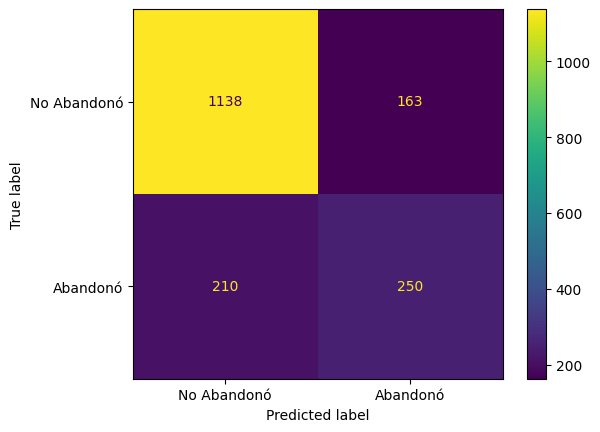

In [147]:
y_previsto_rfc = model_grid_dt.predict(X_test)

print(classification_report(y_test, y_previsto_rfc))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto_rfc, display_labels=['No Abandonó', 'Abandonó']);